<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/designing_a_recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow --upgrade tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/temperature.csv')
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print( df.columns )

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


In [ ]:
#Select a city for weather forecast
df = df [ ['datetime', 'Jerusalem']]
df.head()

,datetime,Jerusalem
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,303.5
2,2012-10-01 14:00:00,303.5
3,2012-10-01 15:00:00,303.5
4,2012-10-01 16:00:00,303.5


In [ ]:
df.isna ().sum()
df = df.dropna ()
df

,datetime,Jerusalem
1,2012-10-01 13:00:00,303.50
2,2012-10-01 14:00:00,303.50
3,2012-10-01 15:00:00,303.50
4,2012-10-01 16:00:00,303.50
5,2012-10-01 17:00:00,303.50
...,...,...
44456,2017-10-27 20:00:00,295.76
44457,2017-10-27 21:00:00,293.15
44458,2017-10-27 22:00:00,294.15
44459,2017-10-27 23:00:00,294.15


In [ ]:
X = df.drop('Jerusalem', axis=1).values
y = df['Jerusalem'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from scipy.sparse import csr_matrix
categorical_features = ["datetime"]  # Convert to a list, assuming there are multiple categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   [0])],  # Specify the index of the datetime column as a list [0]
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<44460x44460 sparse matrix of type '<class 'numpy.float64'>'
	with 44460 stored elements in Compressed Sparse Row format>

In [ ]:
from zmq.sugar.socket import T
# Convert transformed_X back to a DataFrame
pd.DataFrame(transformed_X)

,0
0,"(0, 0)\t1.0"
1,"(0, 1)\t1.0"
2,"(0, 2)\t1.0"
3,"(0, 3)\t1.0"
4,"(0, 4)\t1.0"
...,...
44455,"(0, 44455)\t1.0"
44456,"(0, 44456)\t1.0"
44457,"(0, 44457)\t1.0"
44458,"(0, 44458)\t1.0"


In [ ]:
#Perform data scaling. All values must be scaled from 0 to 1.
data = df ['Jerusalem' ].values
scaler = MinMaxScaler ( feature_range =(0, 1))
data = data.reshape (-1, 1)
data = scaler.fit_transform (data ).flatten ()

In [ ]:
# data smoothing to reduce anomalities
def get_XY ( data , window):
 Y_index = np.arange (window, len (data), window)
 Y = data[ Y_index ]
 rows_x = len (Y)
 X = data[range(window* rows_x )]
 X = np.reshape (X, ( rows_x , window, 1))
 return X, Y
 window = 20

X, y = get_XY ( data, window )

In [ ]:
X

array([[[0.69273363],
        [0.69273363],
        [0.69273363],
        ...,
        [0.69273363],
        [0.69273363],
        [0.69273363]],

       [[0.69273363],
        [0.69273363],
        [0.69273363],
        ...,
        [0.61784596],
        [0.61784596],
        [0.61784596]],

       [[0.61784596],
        [0.67072119],
        [0.67072119],
        ...,
        [0.63373122],
        [0.63373122],
        [0.63373122]],

       ...,

       [[0.53978124],
        [0.53978124],
        [0.50324513],
        ...,
        [0.60286842],
        [0.61171879],
        [0.60286842]],

       [[0.60286842],
        [0.59401806],
        [0.5851677 ],
        ...,
        [0.44900831],
        [0.51209549],
        [0.60286842]],

       [[0.62056915],
        [0.65211274],
        [0.68365633],
        ...,
        [0.4124722 ],
        [0.41746471],
        [0.42631507]]])

In [ ]:
# divide into train and test
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split (X, y ,test_size = 0.2, random_state = 0)

In [ ]:
y

array([0.69273363, 0.61784596, 0.63373122, ..., 0.60286842, 0.62056915,
       0.42631507])

In [ ]:
def create_rnn_model(hidden_units, input_shape, activation, dense_units):
    model = Sequential()
    model.add(SimpleRNN(hidden_units,
                        input_shape=input_shape,
                        activation=activation[0],
                        return_sequences=False))
    model.add(Dense(units=dense_units,
                    activation=activation[1]))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    model.summary()
    return model


In [ ]:
window = 20
model = create_rnn_model(hidden_units=32,
                         dense_units=1,
                         input_shape=(window, 1),
                         activation=['relu', 'linear'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20,  batch_size=32, verbose=1, validation_split=0.2)#, validation_split=0.2

Epoch 1/20
45/45 [==============================] - 3s 22ms/step - loss: 0.2079 - mean_absolute_error: 0.3904 - mean_squared_error: 0.2079 - val_loss: 0.0217 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0217
Epoch 2/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0069 - mean_absolute_error: 0.0675 - mean_squared_error: 0.0069 - val_loss: 0.0044 - val_mean_absolute_error: 0.0533 - val_mean_squared_error: 0.0044
Epoch 3/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0511 - mean_squared_error: 0.0041 - val_loss: 0.0033 - val_mean_absolute_error: 0.0480 - val_mean_squared_error: 0.0033
Epoch 4/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0033 - mean_absolute_error: 0.0456 - mean_squared_error: 0.0033 - val_loss: 0.0030 - val_mean_absolute_error: 0.0433 - val_mean_squared_error: 0.0030
Epoch 5/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_absolute_error

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


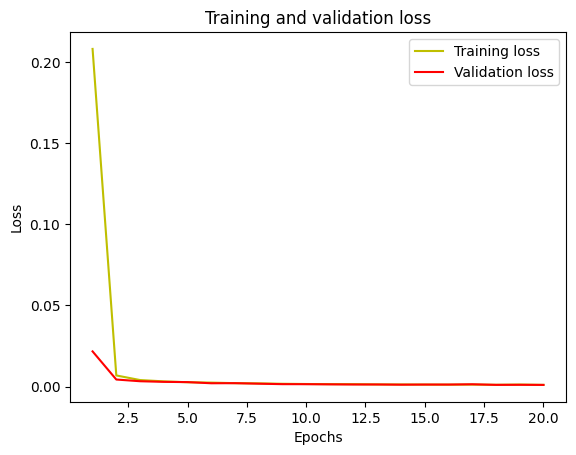

In [ ]:
loss = history.history ['loss']
val_loss = history.history ['val_loss']
epochs = range( 1, len (loss) + 1)
plt.plot (epochs, loss, 'y', label='Training loss')
plt.plot (epochs, val_loss , 'r', label='Validation loss')
plt.title ('Training and validation loss')
plt.xlabel ('Epochs')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()

In [ ]:
def print_error( trainY , testY , train_predict ,
test_predict ):
  # Error of predictions
  mae = ( mean_absolute_error ( trainY , train_predict ) )
  mse = ( mean_squared_error ( trainY , train_predict ))
  #Print RMSE
  print( 'train MAE: %.10f' % ( mae ))
  print( 'train MSE: %.10f' % ( mse ))

  # Error of predictions
  mae = ( mean_absolute_error ( testY , test_predict ) )
  mse = ( mean_squared_error ( testY , test_predict ) )
  #Print RMSE
  print( 'test MAE: %.10f' % ( mae ))
  print( 'test MSE: %.10f' % ( mse ))

# make predictions
train_predict = model.predict ( X_train )
test_predict = model.predict ( X_test )
print_error ( y_train , y_test , train_predict , test_predict )

14/14 [==============================] - 0s 4ms/step
train MAE: 0.0226876466
train MSE: 0.0010333391
test MAE: 0.0229654357
test MSE: 0.0010396997


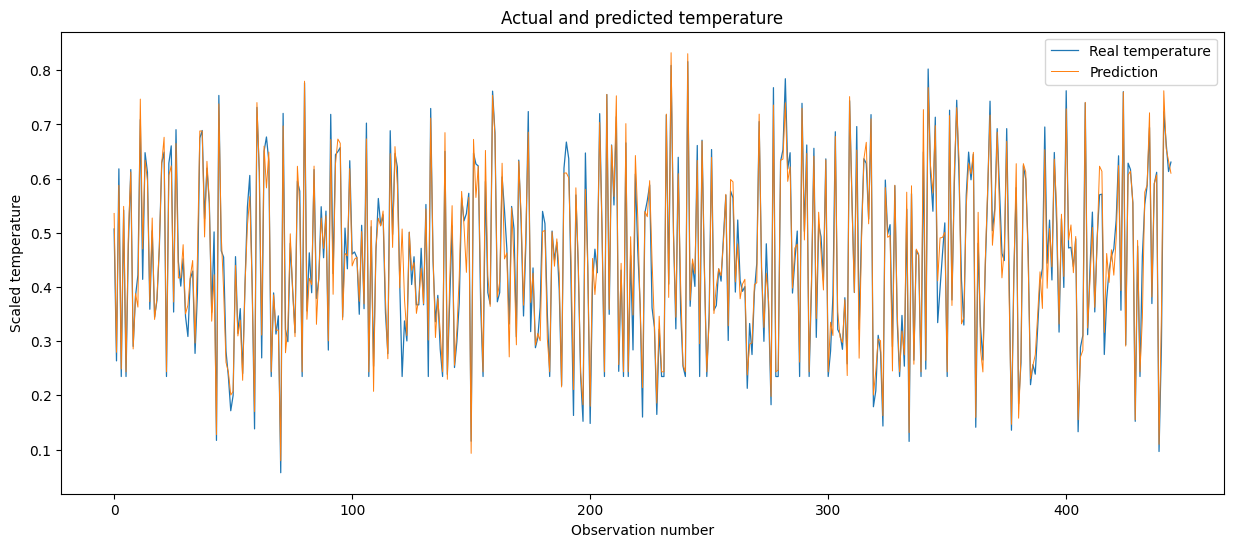

In [ ]:
def plot_result ( testY , test_predict ) :
  actual = testY
  predictions = test_predict
  rows = len (actual)
  plt.figure ( figsize =(15, 6),dpi=100)
  plt.plot (range(rows), actual, linewidth=0.9)
  plt.plot (range(rows), predictions, linewidth=0.7)
  plt . legend (['Real temperature', 'Prediction'])
  plt . xlabel ('Observation number')
  plt . ylabel ('Scaled temperature')
  plt . title ('Actual and predicted temperature')


plot_result ( y_test , test_predict )